# Wrange_act


**Meta**<br />
- Fazer wrangling dos dados de tweets de WeRateDoga para criar análises e visualizações interessantes e confiáveis.

### Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np 
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns
%matplotlib inline

## Gather

#### Coletando cada um dos três pedaços de dados:

**1 - Abrindo o arquivo WeRateDogs** 

In [4]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2 - Baixando as previsões de imagem dos servidores da Udacity de forma programática**

In [6]:
# create folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
tweet_image = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [8]:

tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3 - Consultando a API do Twitter (usando as ID de tweets no arquivo do Twitter de WeRateDogs) para o conjunto de dados completo de cada tweet usando a biblioteca Tweepy do Python e armazenando esses dados em um arquivo chamado tweet_json.txt, onde os dados JSON armazenados de cada tweet serão escritos em sua própria linha. Após será realizada a leitura do .txt linha por linha em um dataframe do Pandas com (no mínimo) ID de tweet, contagem de retweets e contagem de favoritos.**

**Acesso por meio da API Tweepy**

In [9]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

**Escrevendo os dados JSON para o arquivo requerido tweet_json.txt com os dados JSON**

In [12]:
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id)
            
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except:  
            print('Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

Error on tweet id 888202515573088257
Error on tweet id 873697596434513921
Error on tweet id 872668790621863937
Error on tweet id 872261713294495745
Error on tweet id 869988702071779329
Error on tweet id 866816280283807744
Error on tweet id 861769973181624320
Error on tweet id 845459076796616705
Error on tweet id 842892208864923648
Error on tweet id 837012587749474308


Rate limit reached. Sleeping for: 523


Error on tweet id 831926988323639298
Error on tweet id 827228250799742977
Error on tweet id 812747805718642688
Error on tweet id 802247111496568832
Error on tweet id 775096608509886464
Error on tweet id 770743923962707968
Error on tweet id 754011816964026368


Rate limit reached. Sleeping for: 593


Error on tweet id 711652651650457602
Error on tweet id 680055455951884288


Rate limit reached. Sleeping for: 593


Error on tweet id 669749430875258880


**Determinando os elementos para salvar no dataframe**

In [13]:
elements_to_save = ['id','favorite_count', 'retweet_count']

data = []

with open('tweet_json.txt', 'r') as readfile: 
    
    tweet_json = readfile.readline()
    
   
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        
        tweet_json = readfile.readline()
        
            
    
df_tweet = pd.DataFrame.from_dict(data)

## Acess

In [18]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2103,670676092097810432,NaN,NaN,2015-11-28 18:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloo. He's a Westminster Cîroc. Doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670676092...,8,10,Bloo,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
105,872122724285648897,NaN,NaN,2017-06-06 16:07:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kody. He's a baller. Wishes he was a l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872122724...,12,10,Kody,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
2112,670435821946826752,NaN,NaN,2015-11-28 02:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,10,10,None,None,None,None,None
1778,677895101218201600,NaN,NaN,2015-12-18 16:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this was terrifying. Really spooked me up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677895101...,9,10,None,None,None,None,None


In [21]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
print(tweet_archive.name.value_counts())

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
Buddy        7
Daisy        7
Bailey       7
an           7
Bella        6
Dave         6
Leo          6
Rusty        6
Jack         6
Koda         6
Jax          6
Milo         6
Scout        6
Stanley      6
Oscar        6
Sammy        5
          ... 
Vinnie       1
Edd          1
Crouton      1
Carter       1
Ivar         1
Mack         1
Chevy        1
Reagan       1
Divine       1
Colin        1
Link         1
Newt         1
Rhino        1
Bowie        1
Lorelei      1
Severus      1
Rey          1
Kobe         1
Cannon       1
Theo         1
Tiger        1
Maisey       1
Socks        1
Dylan        1
Dixie        1
Ron          1
Mike         1
Yukon        1
Holly        1
Lizzie       1
Name: name, Length: 957, dtype: int64


In [24]:
tweet_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
tweet_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1812,833124694597443584,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,3,Cardigan,0.710523,True,kelpie,0.106102,True,shopping_cart,0.055475,False
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True


In [27]:
tweet_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
print(tweet_image.p1.value_counts())

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

#### Verficando a confiança dos algoritmos na previsão das imagens

In [29]:
conf_a1 = tweet_image.loc[(tweet_image['p1_dog'] == True)]
conf_a2 = tweet_image.loc[(tweet_image['p2_dog'] == True)]
conf_a3 = tweet_image.loc[(tweet_image['p3_dog'] == True)]

In [30]:
conf_a1['p1_conf'].describe()

count    1532.000000
mean        0.613823
std         0.259735
min         0.044333
25%         0.390981
50%         0.614025
75%         0.850559
max         0.999956
Name: p1_conf, dtype: float64

In [31]:
conf_a2['p2_conf'].describe()

count    1553.000000
mean        0.140470
std         0.103521
min         0.000010
25%         0.054455
50%         0.125912
75%         0.202907
max         0.467678
Name: p2_conf, dtype: float64

In [32]:
conf_a3['p3_conf'].describe()

count    1499.000000
mean        0.061642
std         0.052206
min         0.000001
25%         0.016538
50%         0.049218
75%         0.094875
max         0.273419
Name: p3_conf, dtype: float64

In [33]:
df_tweet

,favorite_count,id,retweet_count
0,37734,892420643555336193,8220
1,32400,892177421306343426,6077
2,24399,891815181378084864,4021
3,41040,891689557279858688,8375
4,39231,891327558926688256,9080
5,19721,891087950875897856,3011
6,11533,890971913173991426,1989
7,63633,890729181411237888,18272
8,27114,890609185150312448,4137
9,31100,890240255349198849,7140


In [34]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
favorite_count    2336 non-null int64
id                2336 non-null int64
retweet_count     2336 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [35]:
df_tweet.sample(10)

,favorite_count,id,retweet_count
1270,2437,708349470027751425,775
2141,388,669564461267722241,127
1015,7468,745314880350101504,2942
938,8256,751598357617971201,3244
1393,3500,698989035503689728,1037
2262,491,667211855547486208,242
813,0,768909767477751808,2886
2019,921,671550332464455680,211
1382,6174,699446877801091073,2753
645,13935,791406955684368384,4475


In [36]:
df_tweet.describe()

,favorite_count,id,retweet_count
count,2336.000000,2.336000e+03,2336.000000
mean,7895.751712,7.421677e+17,2902.163099
std,12229.189384,6.828653e+16,4890.593970
min,0.000000,6.660209e+17,0.000000
25%,1370.500000,6.783394e+17,583.750000
50%,3436.500000,7.186224e+17,1360.500000
75%,9663.250000,7.986887e+17,3380.000000
max,162824.000000,8.924206e+17,82859.000000


**Qualidade**

1 - No conjunto de dados tweet_archive existem nomes que provavelmente estão equívocados ('a', 'the', 'an', ...);<br />
2 - Em tweet_archive há entradas sem nome;<br />
3 - Dados do tipo incorreto em tweet_archive (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id e timestamp);<br />
4 - Em tweet_archive existem entradas incorretas envolvendo as colunas 'text' e 'rating_numerator';<br />
5 - Em tweet_image existem tweets que não correspondem a fotos de cachorros;<br />
6 - No conjunto tweet_image existem nomes em maiúsculo e minúsculo nas raças nas colunas 'p1', 'p2' e p'3';<br />
7 - Há dados nos conjuntos tweet_image e df_tweet do tipo incorreto;<br />
8 - Existem dados de tweets e retweets (Só queremos classificações originais (não retweets)).


**Arrumação**

1 - No conjunto tweet_archive as informações das colunas doggo, floofer, pupper e puppo trazem informação qualitativa e exclusiva que pode ser representada em apenas uma coluna;<br />
2 - Os dados dos conjuntos tweet_archive, tweet_image e df_tweet podem formar um só conjunto. Após unificar, excluir as entradas em que não há fotos.

## Clean

**Criando e verificando cópias dos conjuntos**

In [37]:
tweet_archive_clean = tweet_archive.copy()
tweet_image_clean = tweet_image.copy()
df_tweet_clean = df_tweet.copy()

In [38]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
df_tweet_clean.head()

,favorite_count,id,retweet_count
0,37734,892420643555336193,8220
1,32400,892177421306343426,6077
2,24399,891815181378084864,4021
3,41040,891689557279858688,8375
4,39231,891327558926688256,9080


### Qualidade

#### Define <br />
Corrigir em tweet_archive nomes que provavelmente estão equívocados ('a', 'the', 'an',....);


#### Code

In [41]:
# analisando os dados foi observado que a maioria dos nomes equívocados iniciam letra minúscula
# criando a lista de nomes errados
wrong_names = []
for name in tweet_archive_clean.name:
    if name.islower():
        wrong_names.append(name)
        

In [42]:
print(wrong_names)

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [43]:
#substituindo os nomes da lista de nomes errados por "NaN"
tweet_archive_clean.name = tweet_archive_clean.name.apply(lambda name: 'NaN' if name in wrong_names else name)

#### Test

In [44]:
print(tweet_archive_clean.name.value_counts())

None         745
NaN          109
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
Toby           7
Daisy          7
Bailey         7
Buddy          7
Koda           6
Scout          6
Leo            6
Jack           6
Milo           6
Dave           6
Stanley        6
Bella          6
Jax            6
Oscar          6
Rusty          6
Oakley         5
Alfie          5
Sunny          5
            ... 
Batdog         1
Antony         1
Blue           1
Terrenth       1
Hector         1
Butters        1
Yukon          1
Mike           1
Ron            1
Traviss        1
Duchess        1
Tove           1
Chesney        1
Reagan         1
Colin          1
Link           1
Sprinkles      1
Rhino          1
Bowie          1
Lorelei        1
General        1
Rey            1
Kobe           1
Divine         1
Cannon         1
Tiger          1
Maisey         1
Socks         

#### Define <br />
Corrigir em  Em tweet_archive as entradas sem nome

#### Code

In [45]:
#substituindo as entradas sem nome por "NaN"
tweet_archive_clean.name = tweet_archive_clean.name.apply(lambda name: 'NaN' if name == 'None' else name)

#### Test

In [46]:
tweet_archive_clean.name.value_counts()

NaN          854
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
Toby           7
Bailey         7
Buddy          7
Daisy          7
Jack           6
Jax            6
Rusty          6
Dave           6
Koda           6
Oscar          6
Milo           6
Scout          6
Bella          6
Leo            6
Stanley        6
George         5
Chester        5
Phil           5
Larry          5
            ... 
Batdog         1
Antony         1
Blue           1
Terrenth       1
Hector         1
Butters        1
Yukon          1
Mike           1
Ron            1
Traviss        1
Duchess        1
Tove           1
Chesney        1
Reagan         1
Colin          1
Link           1
Sprinkles      1
Rhino          1
Bowie          1
Lorelei        1
General        1
Rey            1
Kobe           1
Divine         1
Cannon         1
Tiger          1
Maisey         1
Socks         

#### Define<br />
Converter os dados do tipo incorreto em tweet_archive (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id e timestamp)


#### Code

In [47]:
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype('str')
tweet_archive_clean.in_reply_to_status_id = tweet_archive_clean.in_reply_to_status_id.astype('str')
tweet_archive_clean.in_reply_to_user_id = tweet_archive_clean.in_reply_to_user_id.astype('str')
tweet_archive_clean.retweeted_status_id = tweet_archive_clean.retweeted_status_id.astype('str')
tweet_archive_clean.retweeted_status_user_id = tweet_archive_clean.retweeted_status_user_id.astype('str')
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

#### Test

In [48]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

#### Define<br />
Verficar e corrgir as classificações incorretas 

#### Code

In [49]:
# alterando a configuração do jupyter notebook
pd.set_option('display.max_colwidth', -1)

In [50]:
#visualizando
tweet_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2293,667152164079423490,nan,nan,2015-11-19 01:27:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,nan,nan,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
1178,719551379208073216,nan,nan,2016-04-11 15:43:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harnold. He accidentally opened the front facing camera. 10/10 get it together Harnold https://t.co/S6JHaSMtln,nan,nan,NaN,https://twitter.com/dog_rates/status/719551379208073216/photo/1,10,10,Harnold,None,None,None,None
890,759566828574212096,nan,nan,2016-07-31 01:50:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,7.395440793195889e+17,4196983835.0,2016-06-05 19:47:03 +0000,"https://twitter.com/dog_rates/status/739544079319588864/photo/1,https://twitter.com/dog_rates/status/739544079319588864/photo/1",10,10,NaN,None,None,None,None
264,842163532590374912,nan,nan,2017-03-16 00:00:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl,nan,nan,NaN,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
147,863432100342583297,nan,nan,2017-05-13 16:33:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQUzR8w3H,nan,nan,NaN,https://twitter.com/dog_rates/status/863432100342583297/photo/1,12,10,Belle,None,None,None,None


In [51]:
tweet_archive_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [52]:
# filtrando os tweets que possuem algum número decimal no texto
x = tweet_archive_clean.text.str.extract(r"(\d\.\d)", expand = False)
tweet_archive_clean.loc[tweet_archive_clean.text.str.extract(r"(\d\.\d)", expand = False).notnull(),'rating_numerator'] = x

#### Test

In [53]:
tweet_archive_clean['rating_numerator'].value_counts()

12      557
11      463
10      461
13      349
9       156
8       102
7       55 
14      54 
5       35 
6       32 
3       19 
4       17 
1       9  
2       9  
2.4     2  
15      2  
0       2  
9.7     2  
420     2  
1.2     2  
2.0     1  
17      1  
20      1  
24      1  
9.5     1  
8.9     1  
44      1  
1776    1  
204     1  
3.5     1  
960     1  
182     1  
165     1  
666     1  
144     1  
143     1  
4.3     1  
99      1  
88      1  
84      1  
5.7     1  
80      1  
121     1  
60      1  
50      1  
45      1  
Name: rating_numerator, dtype: int64

#### Define <br />
Filtrar em tweet_image os tweets que não correspondem a fotos de cachorros, utilizando o primeiro algoritmo porque ele tem um índice de confiança maior que os demais.

#### Code

In [54]:
tweet_image_clean = tweet_image_clean.loc[(tweet_image_clean['p1_dog'] == True)]

#### Test

In [55]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


#### Define <br />
No conjunto tweet_image padronizar como minúsculo o nome das raças nas colunas 'p1', 'p2' e p'3'

#### Code

In [56]:
tweet_image_clean['p1'] = tweet_image_clean['p1'].str.lower()
tweet_image_clean['p2'] = tweet_image_clean['p2'].str.lower()
tweet_image_clean['p3'] = tweet_image_clean['p3'].str.lower()

#### Test

In [57]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define <br />
Corrigir os dados nos conjuntos tweet_image e df_tweet do tipo incorreto e renomear "id" da tabela df_tweet para "tweet_id"

#### Code

In [58]:
tweet_image_clean.tweet_id = tweet_image_clean.tweet_id.astype('str')
df_tweet_clean.id = df_tweet_clean.id.astype('str')
df_tweet_clean = df_tweet_clean.rename(columns={'id':'tweet_id'})

#### Test

In [59]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 124.2+ KB


In [60]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
favorite_count    2336 non-null int64
tweet_id          2336 non-null object
retweet_count     2336 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


#### Define <br />
Buscar em tweet_archive somente classificações originais. A existência de valores na coluna retweeted_status_timestamp" indica a existência de retweets. 

#### Code

In [61]:
tweet_archive_clean = tweet_archive_clean.loc[(tweet_archive_clean['retweeted_status_id'] == 'nan') | (tweet_archive_clean['retweeted_status_user_id'].str == 'nan') | 
(tweet_archive_clean['retweeted_status_timestamp'].isna()),:]

#### Test

In [62]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

### Arrumação

#### Define <br />
Juntar as informações das colunas doggo, floofer, pupper e puppo no conjunto tweet_archive em apenas uma coluna.

In [63]:
tweet_archive_clean['stage'] = tweet_archive_clean[['doggo', 'floofer','pupper', 'puppo']].apply(lambda x:''.join(x), axis= 1)

In [64]:
tweet_archive_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [65]:
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('None',''))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggopuppo','doggo, puppo'))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggofloofer','doggo, floofer'))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggopupper','doggo, pupper'))


tweet_archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'],  axis=1, inplace=True)

#### Test

In [67]:
tweet_archive_clean.stage.value_counts()

                  1831
pupper            224 
doggo             75  
puppo             24  
doggo, pupper     10  
floofer           9   
doggo, floofer    1   
doggo, puppo      1   
Name: stage, dtype: int64

In [68]:
tweet_archive_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1034,745057283344719872,nan,nan,2016-06-21 00:54:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. He's downright gorgeous as hell. Should be on the cover of Dogue. 12/10 would introduce to mom https://t.co/BkgU3rrsXA,nan,nan,NaN,"https://twitter.com/dog_rates/status/745057283344719872/photo/1,https://twitter.com/dog_rates/status/745057283344719872/photo/1",12,10,Oliver,
608,797971864723324932,nan,nan,2016-11-14 01:18:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a helicopter pupper. He takes off at random. H*ckin hard to control. 12/10 rare af https://t.co/GRWPgNKt2z,nan,nan,NaN,"https://twitter.com/dog_rates/status/797971864723324932/photo/1,https://twitter.com/dog_rates/status/797971864723324932/photo/1",12,10,NaN,pupper
1213,715220193576927233,nan,nan,2016-03-30 16:52:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nico. His selfie game is strong af. Excellent use of a sneaky tongue slip. 10/10 star material https://t.co/1OBdJkMOFx,nan,nan,NaN,https://twitter.com/dog_rates/status/715220193576927233/photo/1,10,10,Nico,
1723,680100725817409536,nan,nan,2015-12-24 19:00:23,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This pupper is not coming inside until she catches a snowflake on her tongue. 11/10 the determination is palpable https://t.co/lvMYbmKq8H,nan,nan,NaN,https://twitter.com/dog_rates/status/680100725817409536/photo/1,11,10,NaN,pupper
403,824297048279236611,nan,nan,2017-01-25 16:45:05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt,nan,nan,NaN,"https://twitter.com/dog_rates/status/824297048279236611/photo/1,https://twitter.com/dog_rates/status/824297048279236611/photo/1",11,10,Nala,
2010,672248013293752320,nan,nan,2015-12-03 02:56:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,nan,nan,NaN,https://twitter.com/dog_rates/status/672248013293752320/photo/1,10,10,NaN,


In [69]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 254.9+ KB


#### Define <br />
Unificar os dados dos conjuntos tweet_archive, tweet_image e df_tweet podem formar um só conjunto. Após unificar, excluir as entradas em que não há fotos.

In [70]:
tweet_archive_clean = pd.merge(tweet_archive_clean, tweet_image_clean, on = ['tweet_id'], how = 'inner')

In [71]:
tweet_archive_clean = pd.merge(tweet_archive_clean, df_tweet_clean, on ='tweet_id', how = 'inner')

In [72]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 27 columns):
tweet_id                      1474 non-null object
in_reply_to_status_id         1474 non-null object
in_reply_to_user_id           1474 non-null object
timestamp                     1474 non-null datetime64[ns]
source                        1474 non-null object
text                          1474 non-null object
retweeted_status_id           1474 non-null object
retweeted_status_user_id      1474 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1474 non-null object
rating_numerator              1474 non-null object
rating_denominator            1474 non-null int64
name                          1474 non-null object
stage                         1474 non-null object
jpg_url                       1474 non-null object
img_num                       1474 non-null int64
p1                            1474 non-null object
p1_conf                

## Salvando os dados em arquivo csv

In [73]:
tweet_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Visualização e Análise


**Esta análise teve como objetivo reunir informações acerca das raças mais populares e sua relação com os tweets e retweets.**

In [74]:
v_tweet = pd.read_csv('twitter_archive_master.csv',sep=',')
v_tweet['timestamp'] = pd.to_datetime(v_tweet['timestamp'])
v_tweet.set_index('timestamp', inplace=True)

#### Verificando as 10 raças com maior incidência a partir do algoritmo de maior confiança.


Text(0.5,1,'As 10 Raças com maior incidência')

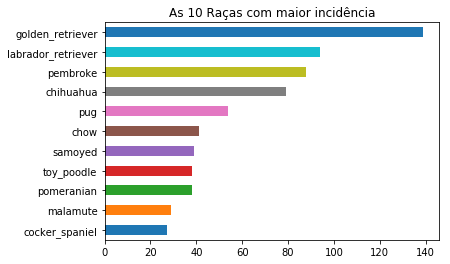

In [75]:
p_dogs_10 = v_tweet['p1'].value_counts()[10::-1]
p_dogs_10.plot(kind='barh')
plt.title('As 10 Raças com maior incidência')

#### Verificando Favorites e Retweets e sua evolução  ao longo do tempo

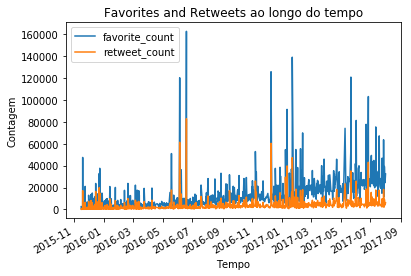

In [76]:
v_tweet[['favorite_count', 'retweet_count']].plot(kind='line')
plt.title('Favorites and Retweets ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Contagem');

#### Verificando as 10 raças mais populares em relação ao tweets

In [77]:
p_dogs_10 = v_tweet.p1.value_counts().head(10).index

In [78]:
p_dogs_data = v_tweet.loc[v_tweet.p1.isin(p_dogs_10)]

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Contagem')

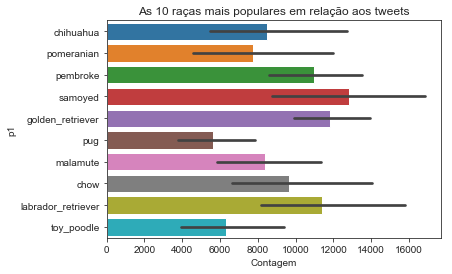

In [79]:
%pylab inline
sns.set_style("ticks")
favorite = sns.barplot(x="favorite_count", y="p1", data=p_dogs_data)
plt.title('As 10 raças mais populares em relação aos tweets')
plt.xlabel('Contagem')


#### Verificando as 10 raças mais populares em relação aos retweets

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Contagem')

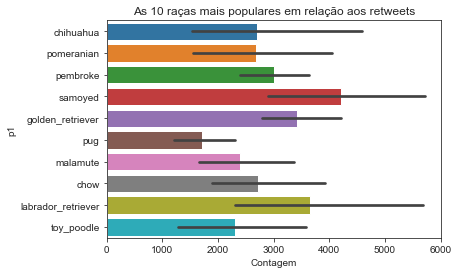

In [80]:
%pylab inline
sns.set_style("ticks")
retweet = sns.barplot(x="retweet_count", y="p1", data=p_dogs_data)
plt.title('As 10 raças mais populares em relação aos retweets')
plt.xlabel('Contagem')

#### Curiosidade: Verificando os 10 nomes mais populares.

Text(0.5,1,'Os 10 nomes mais populares')

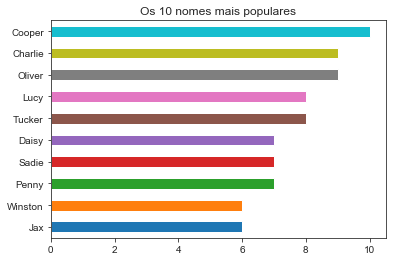

In [81]:
n_dogs_10 = v_tweet['name'] != "NaN"
v_tweet[n_dogs_10].name.value_counts()[9::-1].plot(kind='barh')
plt.title('Os 10 nomes mais populares')

### Conclusão

Após uma análise por meio das visualizações pode-se concluir:<br />
1 - A raça com maior incidência em relação ao algoritmo de maior confiança (golden_retriever) não alcançou o mesmo resultado
 quando incluímos as variáveis tweets e retweets.<br />
2 - É possível ver por meio do segundo gráfico a evolução dos tweets e retweets ao longo do tempo. Situação que pode indicar peso em eventual influência sobre o resultado da raça mais popular.<br />
3 - A raça mais popular em relação aos tweets e retweets (samoyed) não estava nem entre as 5 primeiras em relação à contagem 
do algoritmo de maior confiança. Isso, de certa forma, indica a existência  influência das variáveis tweets e retweets em
relação à popularidade.<br />
4 - Curiosidade: O nome mais comum neste conjunto de dados é "Cooper".
